# PyTorch Workflow

Let's explor an example PyTorch end-to-end workflow.
Resources:
* Books: https://omicstutorials.com/introduction-to-pytorch-for-bioinformatics/#Introduction_to_PyTorch
* Workflow : https://www.learnpytorch.io/01_pytorch_workflow/

What are going to be covered:

<ol>
  <li>Data (prepare and load)</li>
  <li>Build model</li>
  <li>fitting the model to data (training)</li>
  <li>Making predictions and evaluating a model (inference)</li>
  <li>Saving and loading a model</li>
  <li>Putting it all together</li>
</ol>


In [55]:
import torch
from torch import nn # nn conains all of PyTorch's building blocks for neural networks
import matplotlib.pyplot as plt

# Check PyTorch version
torch.__version__

'2.4.0+cu121'

## Data (Preparation and Loading)

Data can be almost anything.. in machine learning.

* Excel spreadsheet
* Images of any kind
* Videos (YouTube has lots of data...)
* Audio liks songs or podcasts
* DNA
* Text

Machine learning is a game of two parts:
1. Get data into a numerical representation.
2. Build a model to learn patterns in that numerical representation.

To showcase this, let's create some *know* data using the linear regression formula.
$$
Y_i = f(X_i, \beta) + e_i
$$
where,
* $Y_i$ = dependent variable
* $f$ = function (linear)
* $X_i$ = independent variable
* $\beta$ = unknown parameters
* $e_i$ = errot terms
We'll use a liner regression formula to mae a straight line with *know* **parameters**.

In [56]:
# Create know parameters
weight = 0.7
bias = 0.3

# Create
start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim = 1) # unsqueeze to ad another dimension
y = weight * X + bias
X[:10], y[:10], len(X), len(y)

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]),
 50,
 50)

### Splitting data into training and test sets (train-test split)

Let's create a training and test set with our data.

In [57]:
# Create a train/test split
train_split = int(0.8 * len(X))
train_split

40

In [58]:
test_split = int(0.2 * len(X))
test_split

10

In [59]:
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

In [60]:
len(X_train), len(X_test)

(40, 10)

How might we better visualize our data?

This is where the data explorer's motto comes in !.

"Visualize, visualize, visualize!"

In [61]:
def plot_predictions(train_data = X_train,
                     train_labels = y_train,
                     test_data = X_test,
                     test_labels = y_test,
                     predictions = None):
  """
  Plots training data, test data and compares predictions.
  """
  plt.figure(figsize = (10,7))

  # Plot training data in blue
  plt.scatter(train_data, train_labels, c = "b", s= 4, label = "Training data")
  # Plot test data in green
  plt.scatter(test_data, test_labels, c = "g", s = 4, label = "Testing data")
  # Are there predictions?
  if predictions is not None:
    # Plot the predictiions if they exist
    plt.scatter(test_data, predictions, c= "r", s = 4, label = "Predictions")
  # Show the legend
  plt.legend(prop = {"size": 14})


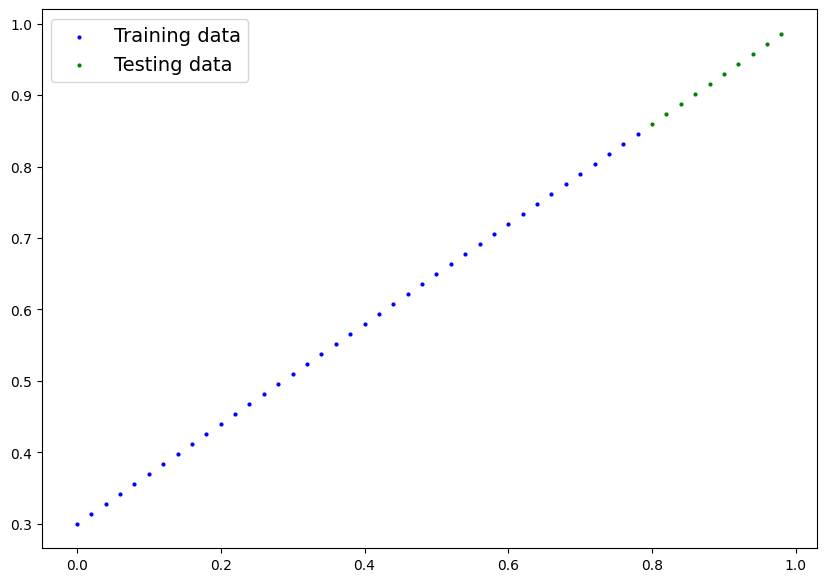

In [62]:
plot_predictions()

## 2. Build model

Our first PyToirch model!
This is very exciting... let's do it!

Real Python OOP: https://realpython.com/python3-object-oriented-programming/

What our model does:
* Start with random vlaues (weight & bias)
* Look at training data and adjust the random values to better represent (or get close to) the ideal values (the weight & bias values we used to create the data)

How does it do so?

Through two main algorithms:
1. Gradient descent
2. Backpropagation

In [63]:
from torch import nn
# Create linear regression model class
class LinearRegressionModel(nn.Module): # <- almost everything in PyTorch inherits from nn.Module
  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(torch.randn(1,
                                            requires_grad=True, # Default True
                                            dtype = torch.float))
    self.bias = nn.Parameter(torch.randn(1,
                                         requires_grad=True,
                                         dtype = torch.float))
  # Forward method to define the computation in the model
  def forward(self, x: torch.Tensor) -> torch.Tensor: # input and output shoud be Tensor
    return self.weights * x + self.bias


### PyTorch model building essentials

* torch.nn - contains all of the buildings for computational graphs (a neural network can be considered a cmputational graph)
* torch.nn.Parameter - what parameters should our model try and learn, often a PyTorch layer from torch.nn will set these for us
* nn.Module - The base class for all neural network modules, if you subclass it, you should overwrite forward() method
* torch.optim - This where the optimizers in PyTorch live, the will help with gradient descent
* def forward() - All nn.Module subclasses require you to overwrite forward, this method defines w3hat happens in the forward computation


### Checking the contents of your PyTorch model

Now we've created a model, now let's see what's inside...

So we can check our model parameters or wha'ts inside our model using `.parameters()`


In [64]:
# Create a random seed
torch.manual_seed(42)

# Create an instance of the model(this is a sublclass of nn.Module)
model_0 = LinearRegressionModel()

# Chek out the parameters
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [65]:
# List named parameters
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [66]:
weight, bias

(0.7, 0.3)

### Making prediction using `torch.inference_mode()`

To check our model's predictive power, let's see how well it predict `y_test` based on `X_test`

When we pass data through our model, it's going to run it through the `forward()` method


In [67]:
# Make prediction with model
with torch.inference_mode():
  y_pred = model_0(X_test)
y_pred

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

In [68]:
with torch.no_grad():
  y_preds = model_0(X_test)
y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

See more in twitter about inference_mood()

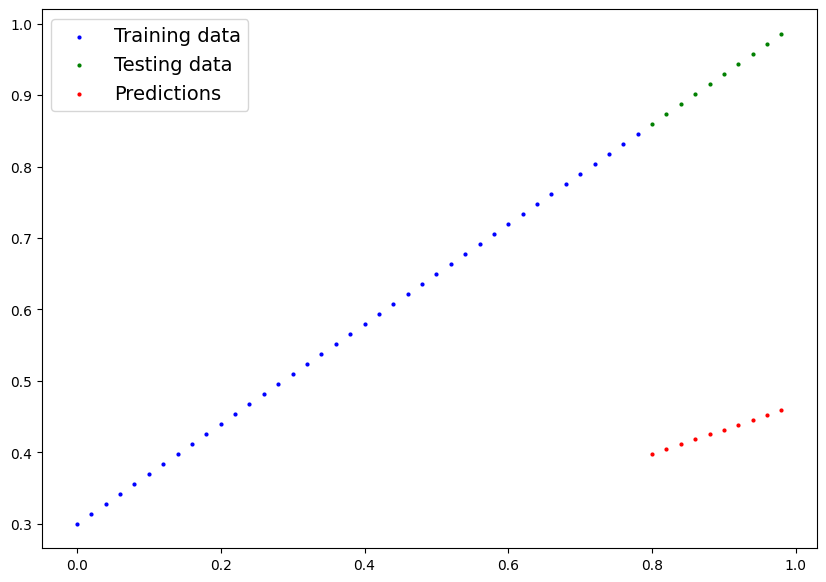

In [69]:
plot_predictions(predictions= y_pred)

In [70]:
y_pred = model_0(X_test)
y_pred

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]], grad_fn=<AddBackward0>)

### 3. Train Model

The whole idea of training is for a model to move from some *unknowsn* parameters (these may be random) to some known parameters.

Or in other words from a poor representation of the data to a better representation of the data.

One way to measure how poor or how worng you models predictions are is to use a loss function.

* Note: Loss function may also be called cost function or criterion in different areas. For our case, we're going to refer to it as a loss function.
* **Loss function:** A function to measure how wrong your modle's predictions are to the ideal outputs, lower is better. https://pytorch.org/docs/stable/nn.html#loss-functions
* **Optimizer:** Takes into account the loss of a model and adjusts the model's parameters (e.g. weight and bias) in our case to improve the loss function. https://pytorch.org/docs/stable/optim.html#torch.optim.Optimizer

And specifically for PyTorch, we need:
* A training loop
* A testing loop

In [71]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [72]:
# Set up a loss function
loss_fn = nn.L1Loss()
# Setup an optimizer
optimizer = torch.optim.SGD(params = model_0.parameters(),
                            lr = 0.01) # Learning Rate

### Building a training loop (and a testing loop) in PyTorch

A couple of things we need in training loop:
0. Loop through the data
1. Forward pass (this involves dta movingt through our modle's `forward()` functions) - also called forward propagation
2. Calculate the loss (compare forward pass predictions to ground truth levels)
3. Optimizer zero grad
4. Loss backward - move backward through the network to calculate the gradients of each of the parameters of our model with respect to the loss (**backpropagation**)
5. Optimizer step - use the optimizer to adjust our model's prameters to try and improve the loss (**gradient descent**).


In [73]:
# An epoch is one loop through the data
epochs = 200
epoch_count = []
train_loss_values = []
test_loss_values = []

# 0. Loop through the data
for epoch in range(epochs):
  # Set the model to training mode
  model_0.train() # train mode in PyTorch set all parameter that require gradients

  # 1. Forward pass
  y_pred = model_0(X_train)

  # 2. Calculate the loss
  loss = loss_fn(y_pred, y_train)

  # 3. Optimizer zero grad
  optimizer.zero_grad()

  # 4. Perform backpropagation on the loss with respect to the params
  loss.backward()

  # 5. Step the optimizer (gradient descent)
  optimizer.step()

  ### Testing
  model_0.eval() # turns off gradient tracking
  with torch.inference_mode(): # same thing can be done using torch.no_grad(): in older version
    # Do the forward pass
    test_pred = model_0(X_test)
    # Calculate the loss
    test_loss = loss_fn(test_pred, y_test)
  if epoch % 10 == 0:
    epoch_count.append(epoch)
    train_loss_values.append(loss.detach().numpy())
    test_loss_values.append(test_loss.detach().numpy())
    print(f"Epoch: {epoch} | Loss: {loss} | Test loss: {test_loss}")
    print(model_0.state_dict())
  ## Print out model state_dict()



Epoch: 0 | Loss: 0.31288138031959534 | Test loss: 0.48106518387794495
OrderedDict([('weights', tensor([0.3406])), ('bias', tensor([0.1388]))])
Epoch: 10 | Loss: 0.1976713240146637 | Test loss: 0.3463551998138428
OrderedDict([('weights', tensor([0.3796])), ('bias', tensor([0.2388]))])
Epoch: 20 | Loss: 0.08908725529909134 | Test loss: 0.21729660034179688
OrderedDict([('weights', tensor([0.4184])), ('bias', tensor([0.3333]))])
Epoch: 30 | Loss: 0.053148526698350906 | Test loss: 0.14464017748832703
OrderedDict([('weights', tensor([0.4512])), ('bias', tensor([0.3768]))])
Epoch: 40 | Loss: 0.04543796554207802 | Test loss: 0.11360953003168106
OrderedDict([('weights', tensor([0.4748])), ('bias', tensor([0.3868]))])
Epoch: 50 | Loss: 0.04167863354086876 | Test loss: 0.09919948130846024
OrderedDict([('weights', tensor([0.4938])), ('bias', tensor([0.3843]))])
Epoch: 60 | Loss: 0.03818932920694351 | Test loss: 0.08886633068323135
OrderedDict([('weights', tensor([0.5116])), ('bias', tensor([0.3788

In [81]:
train_loss_values

[array(0.31288138, dtype=float32),
 array(0.19767132, dtype=float32),
 array(0.08908726, dtype=float32),
 array(0.05314853, dtype=float32),
 array(0.04543797, dtype=float32),
 array(0.04167863, dtype=float32),
 array(0.03818933, dtype=float32),
 array(0.0347609, dtype=float32),
 array(0.03132383, dtype=float32),
 array(0.0278874, dtype=float32),
 array(0.02445896, dtype=float32),
 array(0.02102021, dtype=float32),
 array(0.01758547, dtype=float32),
 array(0.01415539, dtype=float32),
 array(0.01071659, dtype=float32),
 array(0.00728353, dtype=float32),
 array(0.00385178, dtype=float32),
 array(0.00893248, dtype=float32),
 array(0.00893248, dtype=float32),
 array(0.00893248, dtype=float32)]

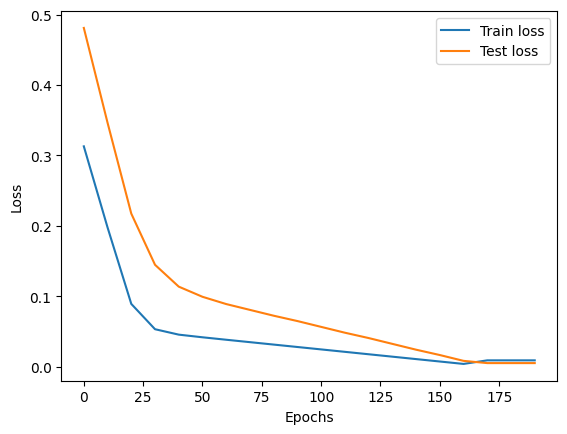

In [82]:
# Plot Loss Values
plt.plot(epoch_count, train_loss_values, label = "Train loss")
plt.plot(epoch_count, test_loss_values, label = "Test loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

In [83]:
with torch.inference_mode():
  y_pred_new = model_0(X_test)

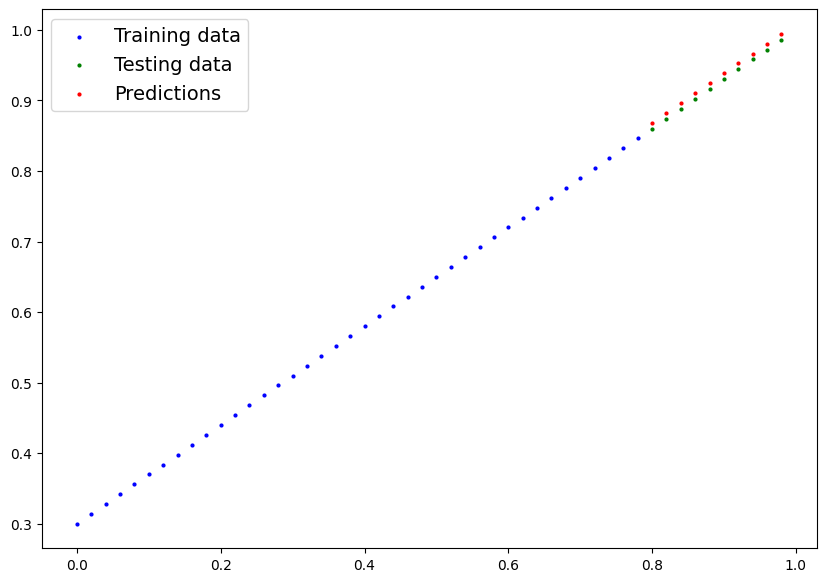

In [84]:
plot_predictions(predictions = y_pred_new)

In [78]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [79]:
weight, bias

(0.7, 0.3)

### Save The Model in PyTorch

There are three main methods you should know about for saving and loading models in PyTorch.

1. `torhc.save()` - allows you save a PyTorch object in Python's pickle format
2. `torch.load()` - allows you load a saved PyTorch object
3. `torch.nn.Module.load_state_dict()` - this allows to load a model's saved state dictionary of the parameters
https://pytorch.org/tutorials/beginner/saving_loading_models.html


In [88]:
model_0.state_dict(), model_0

(OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))]),
 LinearRegressionModel())

In [90]:
# Save our PyTorch model
from pathlib import Path
# 1. Create models directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents = True, exist_ok = True)

# 2. create model save path
MODEL_NAME = "01_pytorch_workflow_model_0.pth" # torch file ends with .pt or .pth
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 3. Save the model's state dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj = model_0.state_dict(),
           f = MODEL_SAVE_PATH)

Saving model to: models/01_pytorch_workflow_model_0.pth


### Saving the model in my gdrive

In [91]:
# 1. Connect to the drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [92]:
# 2. Create folder
import os

# Create a folder in the root directory
!mkdir -p "/content/drive/My Drive/PyTorch_Models"

In [ ]:
# Write something in it
# Write a sample file to Google Drive
with open('/content/drive/My Drive/PyTorch_Models/sample.txt', 'w') as f:
  f.write('Hello, World!')

In [93]:
google_path = "/content/drive/My Drive/PyTorch_Models/01_pytorch_workflow_model_0.pth"

In [94]:
torch.save(obj = model_0.state_dict(),
           f = google_path)

### Loading The Model From Gdrive

Since we save our model's `state_dict()` rather than the entire model, we'll create a new instance of our model class and load the saved `state_dict()` into that.

In [95]:
# Connecting to the gdrive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [108]:
!ls -l "/content/drive/My Drive/PyTorch_Models"

total 2
-rw------- 1 root root 1680 Sep  1 03:54 01_pytorch_workflow_model_0.pth


In [99]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [115]:
# To load in a save state_dict we have to instantiate a new instance our model class
loaded_model_0 = LinearRegressionModel()
# Path of state_dict()
loading_path = "/content/drive/My Drive/PyTorch_Models/01_pytorch_workflow_model_0.pth"

# State dict
state_dict = torch.load(loading_path)
# Load the saved state_dict of model_0 (this will update the new instance with update parameters)
loaded_model_0.load_state_dict(state_dict)

<ipython-input-115-6b466639fe61>:7: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict = torch.load(loading_path)


<All keys matched successfully>

In [116]:
loaded_model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

### Make some predictins with our loaded model

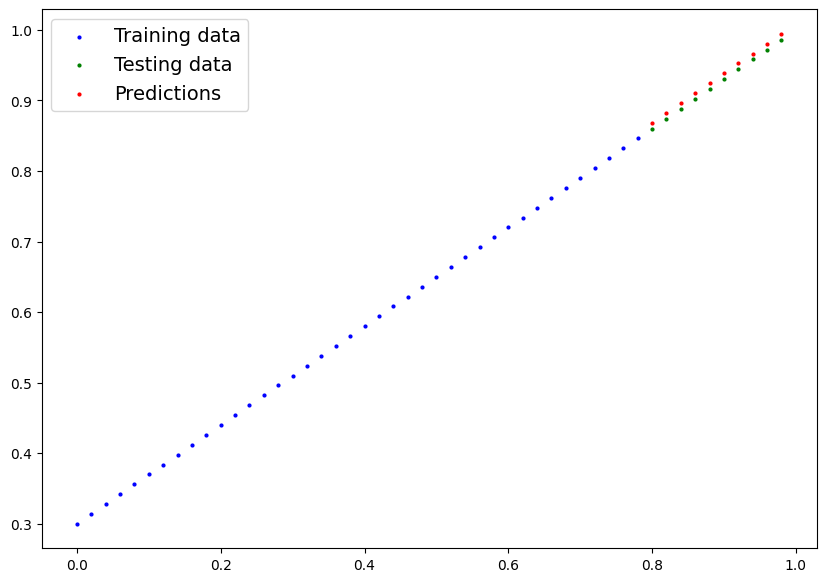

In [118]:
loaded_model_0.eval()
with torch.inference_mode():
  loaded_model_preds = loaded_model_0(X_test)
plot_predictions(predictions = loaded_model_preds)

In [119]:
# Compare loaded model preds with original preds
y_preds == loaded_model_preds

In [117]:
import os
os.listdir()

['.config', 'drive', 'models', 'sample_data']

In [114]:
import os

if os.path.exists("/content/drive/My Drive/PyTorch_Models/01_pytorch_workflow_model_0.pth"):
  print("File exists")
else:
  print("File does not exist")

File exists


In [113]:
!ls  "/content/drive/My Drive/PyTorch_Models"

01_pytorch_workflow_model_0.pth


# Putting it all together

Let's go back through the steps above and see it all in one place

In [1]:
# Import PyTorch and matplotlib
import torch
from torch import nn
import matplotlib.pyplot as plt

# check Pytorch version
torch.__version__

'2.4.0+cu121'

Create devie-agnostic dode

This mean if we've got access to a GPU, our code will use it (for potentially faster computer).

If no GPU is availabe, the code will default to using CPU

In [3]:
# Setup device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")

Using device: cuda


In [4]:
! nvidia-smi

Sun Sep  1 05:05:01 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   49C    P8              12W /  70W |      3MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

# 6.1 Create Data

In [5]:
# Create some data using the linear regression formula of y = weight * X + bias
weight = 0.932
bias = 0.4323

# Create range values
start = 0
end = 1
step = 0.0002

# Create X and y (features and labels)
X = torch.arange(start, end, step).unsqueeze(dim = 1) # without unsqueeze, error will pop up
y = weight * X + bias

X[:10], y[:10]

(tensor([[0.0000],
         [0.0002],
         [0.0004],
         [0.0006],
         [0.0008],
         [0.0010],
         [0.0012],
         [0.0014],
         [0.0016],
         [0.0018]]),
 tensor([[0.4323],
         [0.4325],
         [0.4327],
         [0.4329],
         [0.4330],
         [0.4332],
         [0.4334],
         [0.4336],
         [0.4338],
         [0.4340]]))

In [6]:
# Split data
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split: ]
len(X_train), len(y_train), len(X_test), len(y_test)

(4000, 4000, 1000, 1000)

In [9]:
# Plot the data
def plot_predictions(train_data = X_train,
                     train_labels = y_train,
                     test_data = X_test,
                     test_labels = y_test,
                     predictions = None):
  """
  Plots training data, test data and compares predictions.
  """
  plt.figure(figsize = (10,7))

  # Plot training data in blue
  plt.scatter(train_data, train_labels, c = "b", s= 1, label = "Training data")
  # Plot test data in green
  plt.scatter(test_data, test_labels, c = "g", s = 1, label = "Testing data")
  # Are there predictions?
  if predictions is not None:
    # Plot the predictiions if they exist
    plt.scatter(test_data, predictions, c= "r", s = 1, label = "Predictions")
  # Show the legend
  plt.legend(prop = {"size": 14})


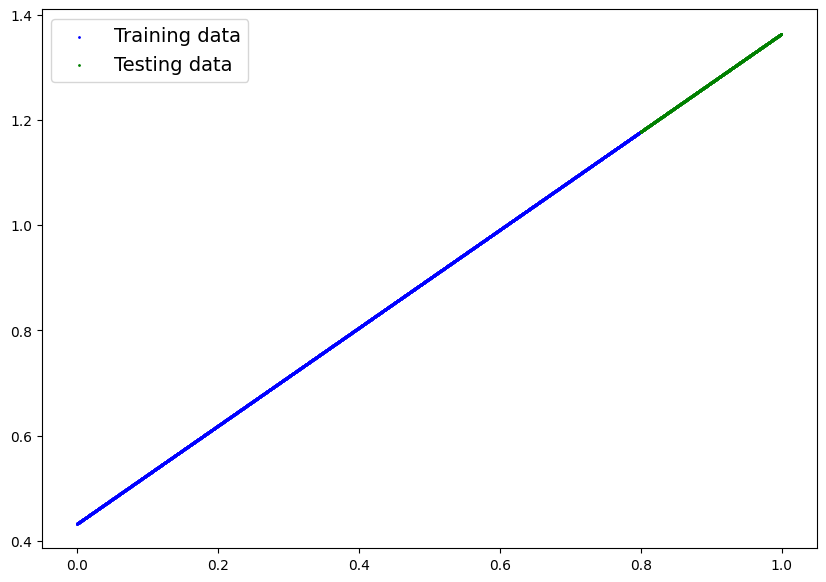

In [10]:
plot_predictions(X_train, y_train, X_test, y_test)

# 6.2 Building a PyTorch Linear Model

In [34]:
class LinearRegressionModelV2(nn.Module):
  def __init__(self):
    super().__init__()
    # Use nn.Linear() for creating the model parameters/ also called: linear transform, probing layer, fully connected layr, dense layer
    self.linear_layer = nn.Linear(in_features = 1, # input size 1 and output size 1
                                  out_features=1)

  # Override the forward method
  def forward(self, x:torch.Tensor) -> torch.Tensor:
    return self.linear_layer(x)

# Set the manual seed
torch.manual_seed(42)
model_1 = LinearRegressionModelV2()
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
             ('linear_layer.bias', tensor([0.8300]))])

In [35]:
# Check the model current device
next(model_1.parameters()).device

device(type='cpu')

In [36]:
# Set the model to use the target device
model_1.to(device)
next(model_1.parameters()).device

device(type='cuda', index=0)

### 6.3 Training
For training we need:
* Loss function
* Optimizer
* Training loop
* Testing loop

In [37]:
# Setup the loss function
loss_fn = nn.L1Loss()

# Setup the optimizer
optimizer = torch.optim.SGD(params = model_1.parameters() ,lr = 0.01) # Adam is also another option

In [38]:
# Let's write a training loop
torch.manual_seed(42)

epochs = 200

# Put data on the target device (device agnostic code for data)
X_train = X_train.to(device)
X_test = X_test.to(device)
y_train = y_train.to(device)
y_test = y_test.to(device)

for epoch in range(epochs):
  model_1.train()

  # 1. Forward pass
  y_pred = model_1(X_train)

  # 2. Calculate the loss
  loss = loss_fn(y_pred, y_train)

  # 3. Optimizer zero grad
  optimizer.zero_grad()

  # 4. Perform Backpropagation
  loss.backward()

  # 5. Iptimizer step
  optimizer.step()

  ### Testing Loop
  model_1.eval()
  with torch.inference_mode():
    # forward pass
    test_pred = model_1(X_test)
    # loss
    test_loss = loss_fn(test_pred, y_test)
  # Print out whats happening
  if epoch % 10 == 0:
    print(f"Epoch: {epoch} || Loss: {loss} || Test loss: {test_loss}")

Epoch: 0 || Loss: 0.3307400941848755 || Test loss: 0.23341067135334015
Epoch: 10 || Loss: 0.21474820375442505 || Test loss: 0.09742380678653717
Epoch: 20 || Loss: 0.09875655174255371 || Test loss: 0.03852871432900429
Epoch: 30 || Loss: 0.05725492537021637 || Test loss: 0.09953514486551285
Epoch: 40 || Loss: 0.05106012895703316 || Test loss: 0.11053851991891861
Epoch: 50 || Loss: 0.04740329831838608 || Test loss: 0.10810535401105881
Epoch: 60 || Loss: 0.04396975040435791 || Test loss: 0.10166444629430771
Epoch: 70 || Loss: 0.04055432230234146 || Test loss: 0.09406376630067825
Epoch: 80 || Loss: 0.0371401309967041 || Test loss: 0.08615089952945709
Epoch: 90 || Loss: 0.03372601792216301 || Test loss: 0.07817558944225311
Epoch: 100 || Loss: 0.03031189925968647 || Test loss: 0.07019350677728653
Epoch: 110 || Loss: 0.026897769421339035 || Test loss: 0.06219768524169922
Epoch: 120 || Loss: 0.02348363772034645 || Test loss: 0.05420185625553131
Epoch: 130 || Loss: 0.020069507881999016 || Test l

In [39]:
# See the model params
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.9292]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.4300], device='cuda:0'))])

In [33]:
weight, bias

(0.932, 0.4323)

In [45]:
# Turn model into evaluation mode
model_1.eval()

with torch.inference_mode():
  y_preds_new = model_1(X_test)

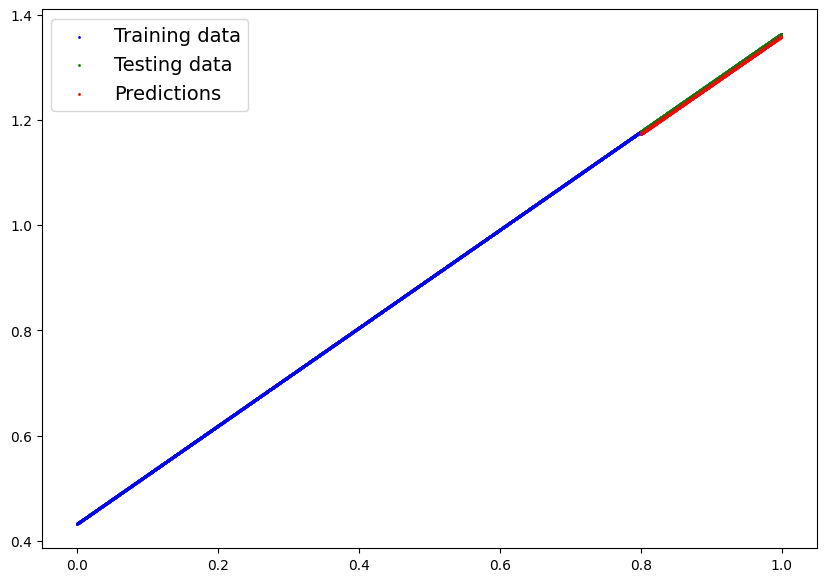

In [46]:
plot_predictions(predictions = y_preds_new.cpu()) # bring back from gpu to cpu with .cpu()